In [1]:
# VGGNet 스타일로 구현
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, padding='same', activation='relu'), 
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'), 
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________

In [4]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 15s 342us/sample - loss: 0.5848 - acc: 0.7886 - val_loss: 0.3304 - val_acc: 0.8783
Epoch 2/25
45000/45000 [==============================] - 9s 200us/sample - loss: 0.3703 - acc: 0.8681 - val_loss: 0.2791 - val_acc: 0.8971
Epoch 3/25
45000/45000 [==============================] - 9s 200us/sample - loss: 0.3274 - acc: 0.8826 - val_loss: 0.2586 - val_acc: 0.9027
Epoch 4/25
45000/45000 [==============================] - 9s 201us/sample - loss: 0.3035 - acc: 0.8921 - val_loss: 0.2473 - val_acc: 0.9094
Epoch 5/25
45000/45000 [==============================] - 9s 200us/sample - loss: 0.2921 - acc: 0.8962 - val_loss: 0.2415 - val_acc: 0.9101
Epoch 6/25
45000/45000 [==============================] - 9s 202us/sample - loss: 0.2777 - acc: 0.9019 - val_loss: 0.2242 - val_acc: 0.9183
Epoch 7/25
45000/45000 [==============================] - 9s 202us/sample - loss: 0.2696 - acc: 0.9029 - val_

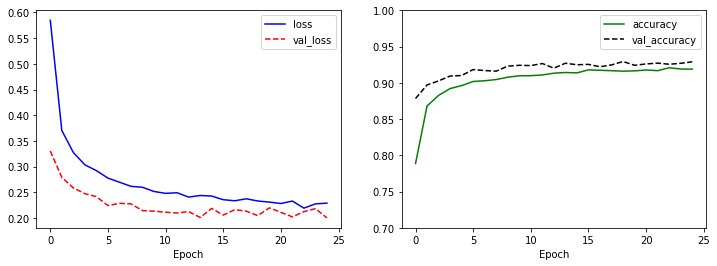

[0.2178044084250927, 0.9247]

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'g-', label='accuracy')
plt.plot(history.history['val_acc'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)